In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

TRENDS_FOLDER = 'data/google_trends/'
GDP_FOLDER = 'data/gdp/'
DATA_PREFIX = 'trends_data_by_topic_'

EPS = 1e-15

## Loading and Preprocessing Data

### Loading Google Trends

In [55]:
COUNTRY = 'CH'

In [56]:
def get_data(country_code):
    file_path = TRENDS_FOLDER + DATA_PREFIX + country_code + '.csv'
    return pd.read_csv(file_path)

In [57]:
df_ch = get_data(COUNTRY)

# Convert to datetime object
df_ch['date'] = df_ch['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Normalize data
numeric_cols = df_ch.columns[1:]
df_ch[numeric_cols] = df_ch[numeric_cols].apply(lambda x: (x - np.mean(x)) / (np.std(x) + EPS))

In [58]:
df_ch.head()

,date,CH_Expense_sample1,CH_Expense_sample2,CH_Expense_sample3,CH_Expense_sample4,CH_Expense_sample5,CH_Expense_average,CH_Research_and_development_sample1,CH_Research_and_development_sample2,CH_Research_and_development_sample3,...,CH_International_Financial_Reporting_Standards_sample3,CH_International_Financial_Reporting_Standards_sample4,CH_International_Financial_Reporting_Standards_sample5,CH_International_Financial_Reporting_Standards_average,CH_Employment_sample1,CH_Employment_sample2,CH_Employment_sample3,CH_Employment_sample4,CH_Employment_sample5,CH_Employment_average
0,2004-01-01,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-2.290502,-2.290502,-2.290502,...,2.112549,3.399191,3.399191,3.271911,0.365166,0.365166,0.365166,0.365166,0.365166,0.365166
1,2004-02-01,0.829809,0.829809,0.829809,0.829809,0.829809,0.829809,-2.290502,-2.290502,-2.290502,...,-2.441645,3.638553,3.638553,2.580178,0.506131,0.506131,0.506131,0.506131,0.506131,0.506131
2,2004-03-01,3.133144,3.133144,3.133144,3.133144,3.133144,3.133144,-2.290502,-2.290502,-2.290502,...,-2.441645,-2.345507,-2.345507,-2.450609,0.459143,0.459143,0.459143,0.459143,0.459143,0.459143
3,2004-04-01,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-2.290502,-2.290502,-2.290502,...,3.202991,2.980306,2.980306,3.133564,0.318178,0.318178,0.318178,0.318178,0.318178,0.318178
4,2004-05-01,-0.592839,-0.592839,-0.592839,-0.592839,-0.592839,-0.592839,-2.290502,-2.290502,-2.290502,...,-2.441645,-2.345507,-2.345507,-2.450609,0.271190,0.271190,0.271190,0.271190,0.271190,0.271190


### Loading GDP
- REF_AREA
- TIME_PERIOD
- OBS_VALUE

In [59]:
df_all_gdp = pd.read_csv(GDP_FOLDER + 'GDP Data.csv')
df_all_gdp = df_all_gdp[df_all_gdp['PRICE_BASE'] == 'LR']
df_all_gdp = df_all_gdp[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]
df_all_gdp['TIME_PERIOD'] = pd.PeriodIndex(df_all_gdp['TIME_PERIOD'], freq='Q').to_timestamp()

In [60]:
gdp_refs = df_all_gdp['REF_AREA'].unique()
gdp_refs.sort()
gdp_refs

array(['AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'EA20', 'ESP', 'EST', 'EU27_2020', 'FIN',
       'FRA', 'G7', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR',
       'NZL', 'OECD', 'OECDE', 'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SVK',
       'SVN', 'SWE', 'USA', 'USMCA', 'ZAF'], dtype=object)

In [61]:
MATCHING = {
    'AR': None,
    'CA': 'CAN',
    'CH': 'CHE',
    'CN': None,
    'DE': 'DEU',
    'GB': 'GBR',
    'JP': 'JPN',
    'KR': 'KOR',
    'US': 'USA'
}

In [62]:
df_current_gdp = df_all_gdp[df_all_gdp['REF_AREA'] == MATCHING[COUNTRY]]
df_current_gdp.drop(columns=['REF_AREA'], inplace=True)
df_current_gdp.rename(columns={'TIME_PERIOD': 'date', 'OBS_VALUE': 'gdp'}, inplace=True)
df_current_gdp.set_index('date')

C:\Users\sebge\AppData\Local\Temp\ipykernel_15536\664852478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_gdp.drop(columns=['REF_AREA'], inplace=True)
C:\Users\sebge\AppData\Local\Temp\ipykernel_15536\664852478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_gdp.rename(columns={'TIME_PERIOD': 'date', 'OBS_VALUE': 'gdp'}, inplace=True)


,gdp
date,
2010-01-01,62729.3
1991-10-01,53349.9
1991-07-01,53202.7
1991-04-01,53271.8
1991-01-01,53868.4
...,...
2011-04-01,64103.4
2011-01-01,63868.3
2010-10-01,63599.1


## Simple Prediction Model

### We start with a simple regression model

In [63]:
matched_by_date = pd.merge(df_ch, df_current_gdp, on='date', how='inner')
len(matched_by_date), len(df_ch), len(df_current_gdp)

(82, 245, 134)

In [64]:
matched_by_date.sort_index(inplace=True)
min_date = matched_by_date['date'].min()

In [65]:
matched_by_date['date'] = matched_by_date['date'].apply(lambda x: (x - min_date).days)
matched_by_date['date'] = matched_by_date['date'] / matched_by_date['date'].max()

In [66]:
matched_by_date

,date,CH_Expense_sample1,CH_Expense_sample2,CH_Expense_sample3,CH_Expense_sample4,CH_Expense_sample5,CH_Expense_average,CH_Research_and_development_sample1,CH_Research_and_development_sample2,CH_Research_and_development_sample3,...,CH_International_Financial_Reporting_Standards_sample4,CH_International_Financial_Reporting_Standards_sample5,CH_International_Financial_Reporting_Standards_average,CH_Employment_sample1,CH_Employment_sample2,CH_Employment_sample3,CH_Employment_sample4,CH_Employment_sample5,CH_Employment_average,gdp
0,0.000000,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-2.290502,-2.290502,-2.290502,...,3.399191,3.399191,3.271911,0.365166,0.365166,0.365166,0.365166,0.365166,0.365166,57479.5
1,0.012304,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-2.290502,-2.290502,-2.290502,...,2.980306,2.980306,3.133564,0.318178,0.318178,0.318178,0.318178,0.318178,0.318178,57859.5
2,0.024608,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,-3.641371,10.034842,10.034842,10.034842,...,-2.345507,-2.345507,-2.450609,0.224201,0.224201,0.224201,0.224201,0.224201,0.224201,57702.0
3,0.037047,0.220103,0.220103,0.220103,0.220103,0.220103,0.220103,-2.290502,-2.290502,-2.290502,...,2.322060,2.322060,2.731101,0.271190,0.271190,0.271190,0.271190,0.271190,0.271190,57758.8
4,0.049486,-0.389604,-0.389604,-0.389604,-0.389604,-0.389604,-0.389604,1.160595,1.160595,1.160595,...,-2.345507,-2.345507,-1.897223,0.130225,0.130225,0.130225,0.130225,0.130225,0.130225,58179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.950514,1.033045,1.033045,1.033045,1.033045,1.033045,1.033045,-0.318447,-0.318447,-0.318447,...,-0.789652,-0.789652,-0.828180,0.788061,0.788061,0.788061,0.788061,0.788061,0.788061,69917.3
78,0.962818,0.965299,0.965299,0.965299,0.965299,0.965299,0.965299,-0.441700,-0.441700,-0.441700,...,-0.729811,-0.729811,-0.777873,0.271190,0.271190,0.271190,0.271190,0.271190,0.271190,69851.3
79,0.975257,2.658928,2.658928,2.658928,2.658928,2.658928,2.658928,-0.071940,-0.071940,-0.071940,...,-0.729811,-0.729811,-0.777873,0.929026,0.929026,0.929026,0.929026,0.929026,0.929026,69800.1
80,0.987696,2.184712,2.184712,2.184712,2.184712,2.184712,2.184712,-0.318447,-0.318447,-0.318447,...,-0.789652,-0.789652,-0.840757,1.163967,1.163967,1.163967,1.163967,1.163967,1.163967,69977.5


In [67]:
number_train = int(len(matched_by_date) * 0.9)

In [68]:
x_train = matched_by_date.iloc[:number_train, :-1].values
y_train = matched_by_date.iloc[:number_train, -1].values
x_valid = matched_by_date.iloc[number_train:, :-1].values
y_valid = matched_by_date.iloc[number_train:, -1].values


In [77]:
weights = np.linalg.lstsq(x_train, y_train, rcond=1e-15)[0]
y_pred = x_valid @ weights
y_pred_train = x_train @ weights
np.linalg.norm(y_pred - y_valid) / y_valid.size

106458.89068900784

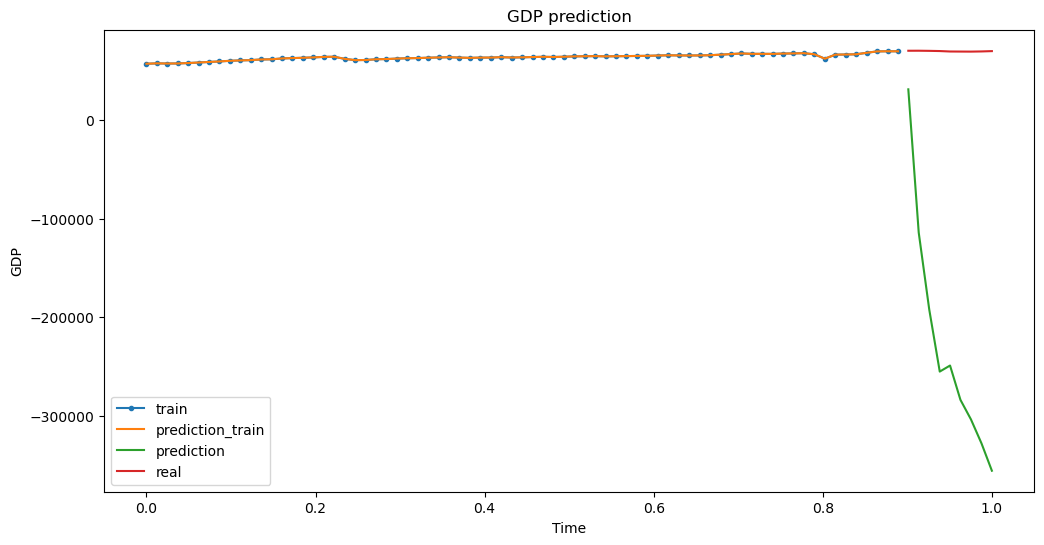

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(x_train[:, 0], y_train, label='train',  marker='.')
plt.plot(x_train[:, 0], y_pred_train, label='prediction_train')
plt.plot(x_valid[:, 0], y_pred, label='prediction')
plt.plot(x_valid[:, 0], y_valid, label='real')
plt.title('GDP prediction')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()